# COVID XRAY Image Analysis

## Explorative Data Analysis
In this notebook we will import and take a look at the kaggle data, namely the images and metadata sheets

### Importing `libraries`

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

### Importing `meta data`

In [2]:
covid_df = pd.read_excel('../data/raw/COVID.metadata.xlsx')
covid_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [14]:
normal_df = pd.read_excel('../data/raw/Normal.metadata.xlsx')
normal_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [15]:
lung_opacity_df = pd.read_excel('../data/raw/Lung_Opacity.metadata.xlsx')
lung_opacity_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [16]:
viral_pneumonia_df = pd.read_excel('../data/raw/Viral Pneumonia.metadata.xlsx')
viral_pneumonia_df.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


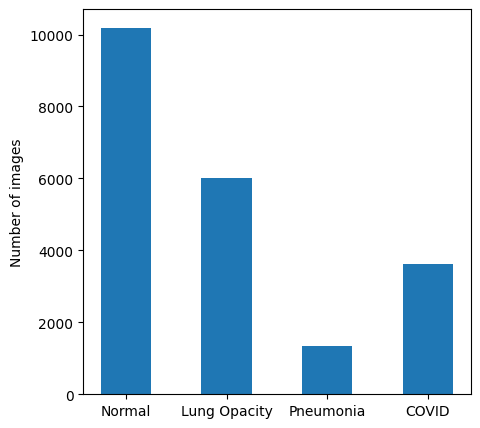

In [17]:
# count of images from meta data

count_of_images = [normal_df['FILE NAME'].count(), lung_opacity_df['FILE NAME'].count(), viral_pneumonia_df['FILE NAME'].count(), covid_df['FILE NAME'].count()]
plt.figure(figsize=(5, 5))
plt.bar(x = range(1,5), height = count_of_images, width = 0.5)
plt.ylabel('Number of images')
plt.xticks([1, 2, 3, 4], ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID']);

In [18]:
pd.DataFrame({'Count of Images': count_of_images}, index = ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID'])

,Count of Images
Normal,10192
Lung Opacity,6012
Pneumonia,1345
COVID,3616


In [19]:
# table with unique sizes

unique_sizes = pd.DataFrame(data = [normal_df['SIZE'].unique(), lung_opacity_df['SIZE'].unique(), viral_pneumonia_df['SIZE'].unique(), covid_df['SIZE'].unique()], 
                            index = ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID'], columns = ['Unique sizes'])

unique_sizes

,Unique sizes
Normal,256*256
Lung Opacity,256*256
Pneumonia,256*256
COVID,256*256


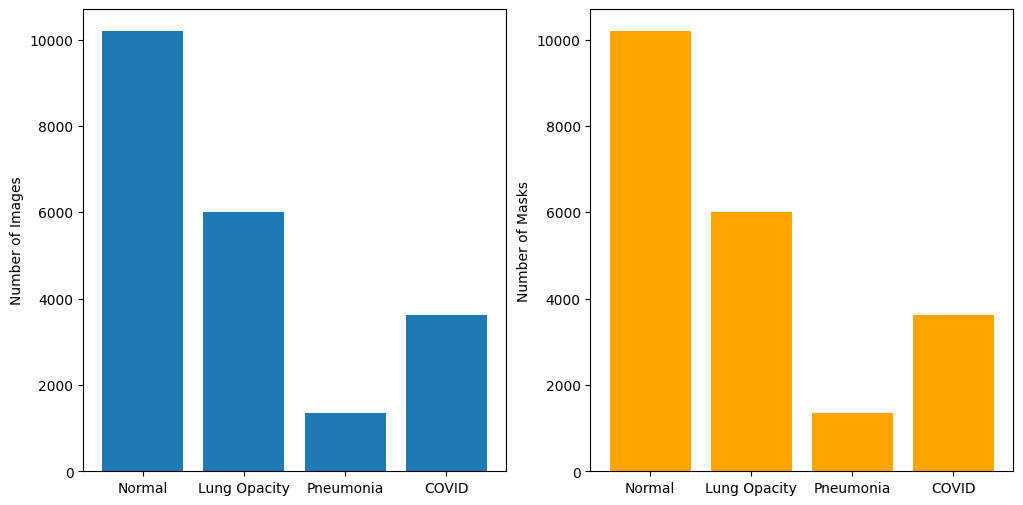

In [20]:
data_path = '../data/raw/'
categories = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

#Visualization

#Counting images per category
image_counts = {category: len(os.listdir(os.path.join(data_path, category, 'images'))) for category in categories}

#Subplots for visualization
fig, axs = plt.subplots(1, 2, figsize = (12, 6));

axs[0].bar(image_counts.keys(), image_counts.values());
axs[0].set_ylabel('Number of Images');
axs[0].set_xticks([0, 1, 2, 3], ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID']);

#Counting masks per category
mask_counts = {category: len(os.listdir(os.path.join(data_path, category, 'masks'))) for category in categories}

axs[1].bar(mask_counts.keys(), mask_counts.values(), color = 'orange');
axs[1].set_ylabel('Number of Masks');
axs[1].set_xticks([0, 1, 2, 3], ['Normal', 'Lung Opacity', 'Pneumonia', 'COVID']);

plt.show();

### Importing and displaying images, masks and overlays

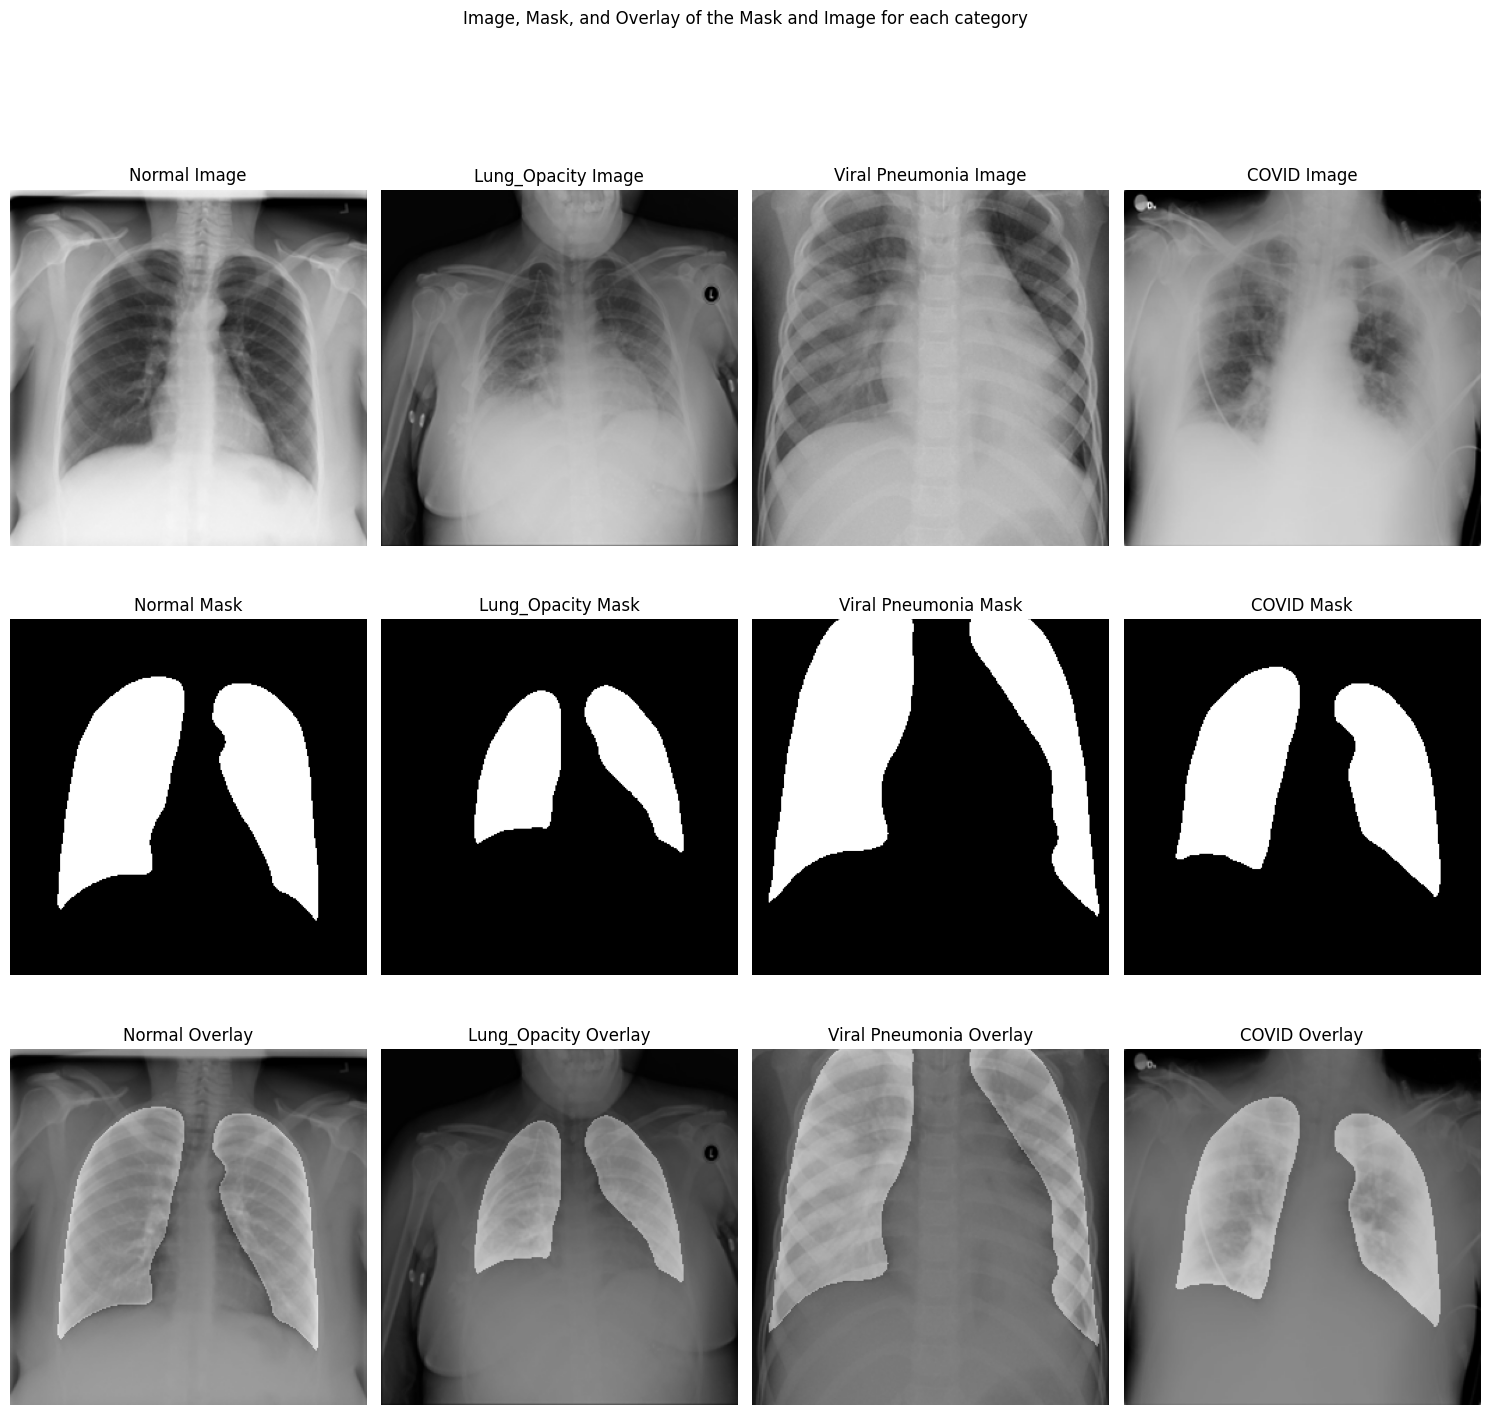

In [21]:
#Overlaying masks on images
from PIL import Image, ImageEnhance

data_path = "../data/raw/"
categories = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

def overlay_mask_on_image(image_path, mask_path):
    with Image.open(image_path) as image, Image.open(mask_path) as mask:

        mask = mask.convert('RGBA')
        image = image.convert('RGBA') #Both has to be in RGBA mode
        image = image.resize(mask.size)

        alpha = 90 #Transparency level
        mask.putalpha(alpha)

        combined = Image.alpha_composite(image, mask)
        return combined

def display(categories, rows = 3, cols = 4):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    fig.suptitle('Image, Mask, and Overlay of the Mask and Image for each category')

    for cols, category in enumerate(categories):
        image_dir = os.path.join(data_path, category, 'images')
        mask_dir = os.path.join(data_path, category, 'masks')
        image_file = os.listdir(image_dir)[0]
        mask_file = os.listdir(mask_dir)[0]
        image_path = os.path.join(image_dir, image_file)
        mask_path = os.path.join(mask_dir, mask_file)

        with Image.open(image_path) as img:
            image = img.convert('RGB')
        with Image.open(mask_path) as msk:
            mask = msk.convert('L') #Mask is a greyscale image
        overlay = overlay_mask_on_image(image_path, mask_path)

        axes[0, cols].imshow(image);
        axes[0, cols].set_title(f'{category} Image');
        axes[0, cols].axis('off');

        axes[1, cols].imshow(mask, cmap = 'Greys_r');
        axes[1, cols].set_title(f'{category} Mask');
        axes[1, cols].axis('off');

        axes[2, cols].imshow(overlay)
        axes[2, cols].set_title(f'{category} Overlay')
        axes[2, cols].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top = 0.9)
    plt.show()

display(categories)

### Statistics for image arrays

In [22]:
img_covid_1 = cv2.imread('../data/raw/COVID/images/COVID-1.png', cv2.IMREAD_COLOR)
img_covid_1

array([[[185, 185, 185],
        [ 40,  40,  40],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 24,  24,  24],
        [131, 131, 131]],

       [[ 75,  75,  75],
        [ 14,  14,  14],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  8,   8,   8],
        [ 42,  42,  42]],

       [[ 11,  11,  11],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  3,   3,   3],
        [ 12,  12,  12]],

       ...,

       [[ 78,  78,  78],
        [ 62,  62,  62],
        [ 68,  68,  68],
        ...,
        [  3,   3,   3],
        [ 13,  13,  13],
        [ 27,  27,  27]],

       [[104, 104, 104],
        [ 74,  74,  74],
        [ 75,  75,  75],
        ...,
        [  1,   1,   1],
        [ 23,  23,  23],
        [ 83,  83,  83]],

       [[156, 156, 156],
        [ 90,  90,  90],
        [ 78,  78,  78],
        ...,
        [  1,   1,   1],
        [ 45,  45,  45],
        [167, 167, 167]]

In [23]:
# importing 50 images and calculating arrays' averages and standard deviations

img_covid_mean = []
img_covid_std = []
img_normal_mean = []
img_normal_std = []
img_lung_opacity_mean = []
img_lung_opacity_std = []
img_viral_pneumonia_mean = []
img_viral_pneumonia_std = []

for i in range(1,51):
    img_covid = cv2.imread(f'../data/raw/COVID/images/COVID-{i}.png', cv2.IMREAD_COLOR)
    img_covid_mean.append(img_covid.mean())
    img_covid_std.append(img_covid.std())

    img_normal = cv2.imread(f'../data/raw/Normal/images/Normal-{i}.png', cv2.IMREAD_COLOR)
    img_normal_mean.append(img_normal.mean())
    img_normal_std.append(img_normal.std())

    img_lung_opacity = cv2.imread(f'../data/raw/Lung_Opacity/images/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    img_lung_opacity_mean.append(img_lung_opacity.mean())
    img_lung_opacity_std.append(img_lung_opacity.std())

    img_viral_pneumonia = cv2.imread(f'../data/raw/Viral Pneumonia/images/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    img_viral_pneumonia_mean.append(img_viral_pneumonia.mean())
    img_viral_pneumonia_std.append(img_viral_pneumonia.std())



### Statistics for mask arrays

In [24]:
# importing 50 masks and calculating arrays' averages and standard deviations

mask_covid_mean = []
mask_covid_std = []
mask_normal_mean = []
mask_normal_std = []
mask_lung_opacity_mean = []
mask_lung_opacity_std = []
mask_viral_pneumonia_mean = []
mask_viral_pneumonia_std = []

for i in range(1,51):
    mask_covid = cv2.imread(f'../data/raw/COVID/masks/COVID-{i}.png', cv2.IMREAD_COLOR)
    mask_covid_mean.append(mask_covid.mean())
    mask_covid_std.append(mask_covid.std())

    mask_normal = cv2.imread(f'../data/raw/Normal/masks/Normal-{i}.png', cv2.IMREAD_COLOR)
    mask_normal_mean.append(mask_normal.mean())
    mask_normal_std.append(mask_normal.std())

    mask_lung_opacity = cv2.imread(f'../data/raw/Lung_Opacity/masks/Lung_Opacity-{i}.png', cv2.IMREAD_COLOR)
    mask_lung_opacity_mean.append(mask_lung_opacity.mean())
    mask_lung_opacity_std.append(mask_lung_opacity.std())

    mask_viral_pneumonia = cv2.imread(f'../data/raw/Viral Pneumonia/masks/Viral Pneumonia-{i}.png', cv2.IMREAD_COLOR)
    mask_viral_pneumonia_mean.append(mask_viral_pneumonia.mean())
    mask_viral_pneumonia_std.append(mask_viral_pneumonia.std())



### Plotting Arrays Statistics

In [25]:
img_avgs = [np.mean(img_covid_mean), np.mean(img_normal_mean), np.mean(img_lung_opacity_mean), np.mean(img_viral_pneumonia_mean)]
img_stds = [np.mean(img_covid_std), np.mean(img_normal_std), np.mean(img_lung_opacity_std), np.mean(img_viral_pneumonia_std)]
mask_avgs = [np.mean(mask_covid_mean), np.mean(mask_normal_mean), np.mean(mask_lung_opacity_mean), np.mean(mask_viral_pneumonia_mean)]
mask_stds = [np.mean(mask_covid_std), np.mean(mask_normal_std), np.mean(mask_lung_opacity_std), np.mean(mask_viral_pneumonia_std)]

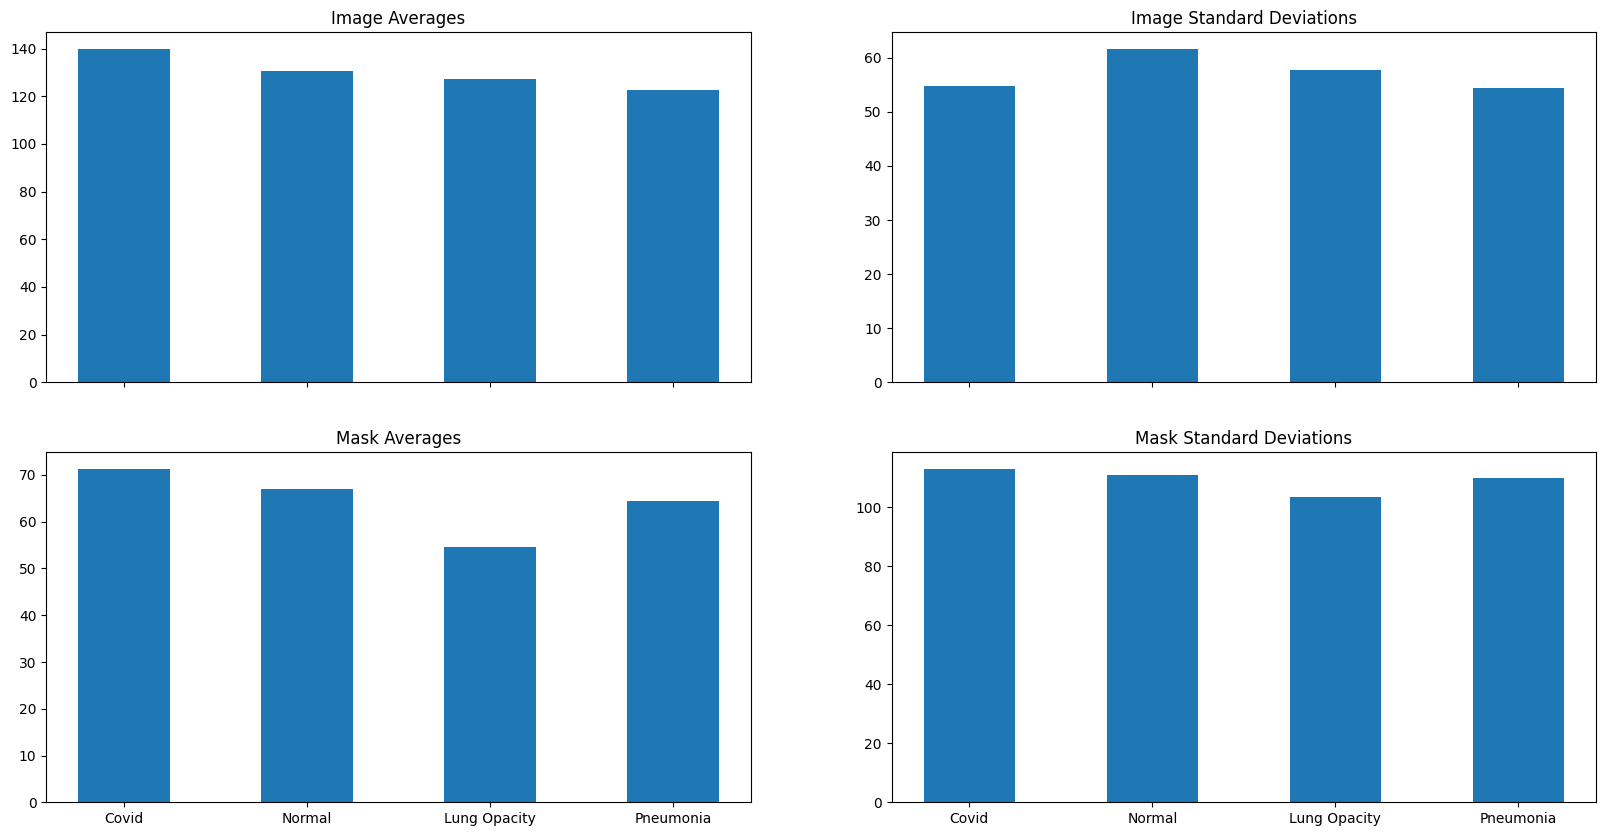

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.bar(range(1,5), img_avgs, width = 0.5)
plt.title('Image Averages')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(222)
plt.bar(range(1,5), img_stds, width = 0.5)
plt.title('Image Standard Deviations')
plt.xticks([1, 2, 3, 4], []);

plt.subplot(223)
plt.bar(range(1,5), mask_avgs, width = 0.5)
plt.title('Mask Averages')
plt.xticks([1, 2, 3, 4], ['Covid', 'Normal', 'Lung Opacity', 'Pneumonia']);

plt.subplot(224)
plt.bar(range(1,5), mask_stds, width = 0.5)
plt.title('Mask Standard Deviations')
plt.xticks([1, 2, 3, 4], ['Covid', 'Normal', 'Lung Opacity', 'Pneumonia']);

### Analysis of pixel intensities

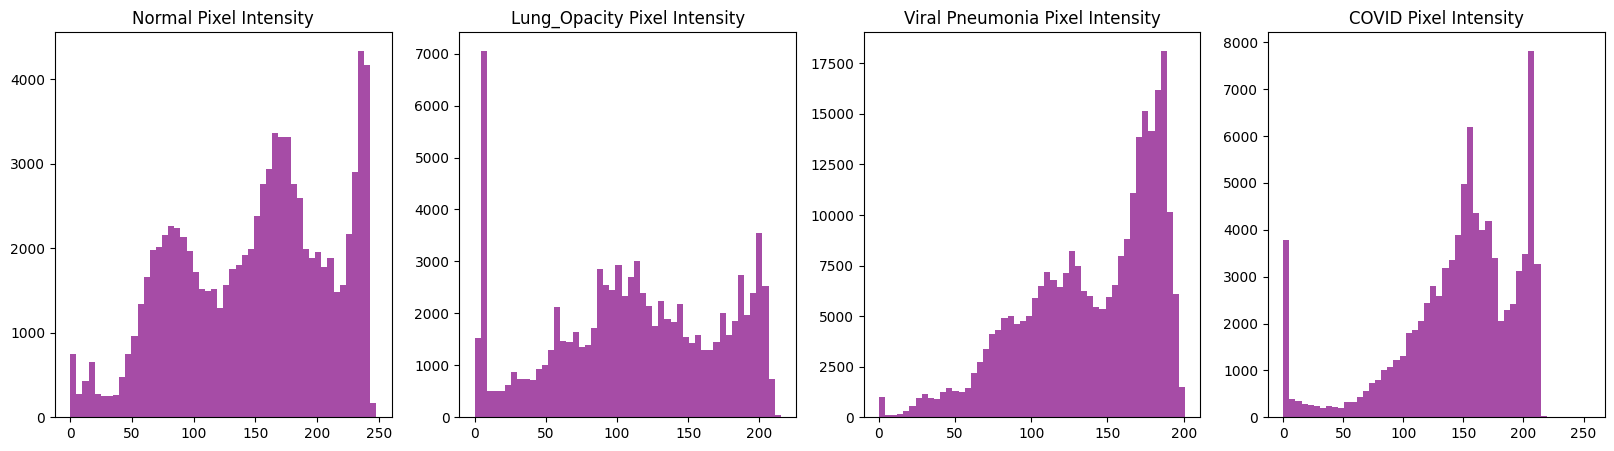

In [27]:
#Pixel intensities of images

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

for i, category in enumerate(categories):
    image_dir = os.path.join(data_path, category, 'images')
    sample_image = os.listdir(image_dir)[0]
    with Image.open(os.path.join(image_dir, sample_image)) as img:
        pixel_values = np.array(img).flatten()
        axes[i].hist(pixel_values, bins = 50, color = 'purple', alpha = 0.7)
        axes[i].set_title(f'{category} Pixel Intensity')

plt.show()

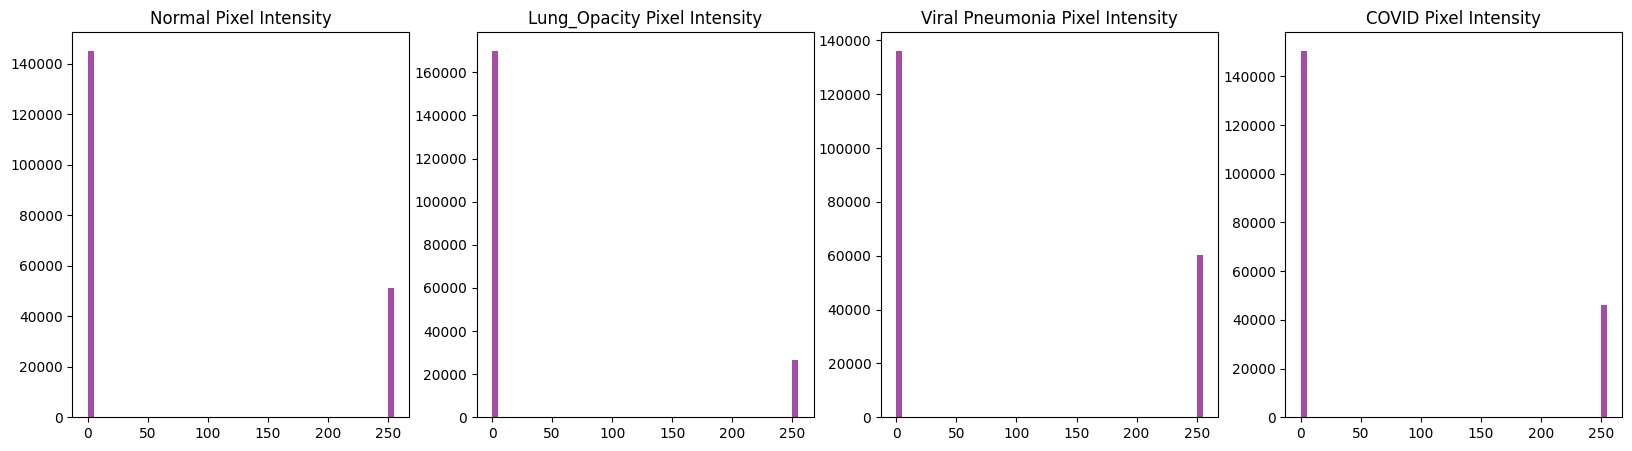

In [28]:
#Pixel intensities of masks

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

for i, category in enumerate(categories):
    mask_dir = os.path.join(data_path, category, 'masks')
    sample_mask = os.listdir(mask_dir)[0]
    with Image.open(os.path.join(mask_dir, sample_mask)) as img:
        pixel_values = np.array(img).flatten()
        axes[i].hist(pixel_values, bins = 50, color = 'purple', alpha = 0.7)
        axes[i].set_title(f'{category} Pixel Intensity')

plt.show()